In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = [12,4.5]
plt.rcParams["axes.grid"] = False
plt.rcParams['font.family'] = "Ubuntu Mono"  

In [14]:
from math import comb
from itertools import product

In [15]:
N = 4      # number of particles
states = 2 # number of states permitted for the particle
macrostates = [x for x in product(range(N+1), repeat = states) if sum(x) == N] # All probable macrostates

In [16]:
def nmicrostates(list):
    """Returns the total number of possible microstates for a paticular macrostate"""
    N = sum(list)
    ans = 1
    for i in range(len(list)):
        ans *= comb(N,list[i])
        N -= list[i]
    return ans

microstates = [nmicrostates(b) for b in macrostates] # The total number of mircrostates for a paticular macrostate

In [17]:
df = pd.DataFrame({"Macrostates": macrostates,"Microstates": microstates})
df = df.rename_axis('State',axis = 'columns')

df.index += 1

In [18]:
max_probable = macrostates[microstates.index(max(microstates))]
min_probable = macrostates[microstates.index(min(microstates))]
total_probability = sum(microstates)

In [19]:
total_probability 

16

In [20]:
max_probable,max(microstates)/sum(microstates)

((2, 2), 0.375)

In [21]:
df["Probability"] = [microstates[i]/total_probability for i in range(len(microstates))]

In [23]:
df

State,Macrostates,Microstates,Probability
1,"(0, 4)",1,0.0625
2,"(1, 3)",4,0.2500
3,"(2, 2)",6,0.3750
4,"(3, 1)",4,0.2500
5,"(4, 0)",1,0.0625


Text(0.5, 1.0, 'Probability Distribution')

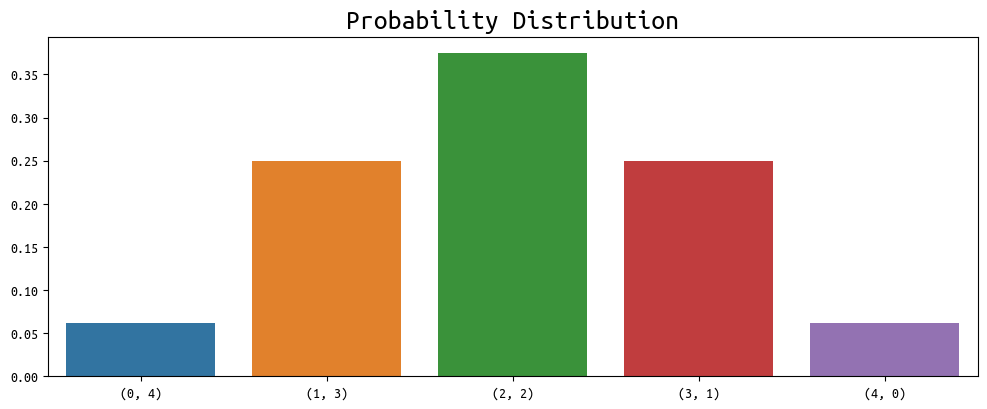

In [27]:
sns.barplot(y = df.Probability.values,x = df.Macrostates.values)
plt.title("Probability Distribution",fontsize = 20)